In [3]:
import numpy as np
import scipy.interpolate as spip

from time import process_time

from pbh import compute_evolution
from temperature import Hawking_temperature
from utils import load_CDF_data

In [4]:
CDF_data = load_CDF_data("CDF_data.h5")
CDF_vals = CDF_data[:, 0]
x_vals = CDF_data[:, 1]

inv_CDF_interp = spip.CubicSpline(CDF_vals, x_vals)

temperature_f = Hawking_temperature("Kerr")

In [5]:
# Size of arrays to be contructed (this is a conservative value which 
# works for all masses up to 100 since this is the value we are trying 
# to predict in this notebook)
N = 50000

# Array of values for the initial mass M
M_values = np.arange(2., 101., 1.)

# How many repetitions to do for each value of the initial mass
N_reps = 100

# Initial value for the angular momentum of the black hole
init_J = 0.

# Path to the file where the results from the run will be saved
results_file = "./data/sequential_data.csv"


In [7]:
for init_M in M_values:
    print(init_M)
    for _ in range(N_reps):
        rands = np.random.uniform(
            size=N,
            low=CDF_vals[0],
            high=CDF_vals[-1],
        )
        changes_array = inv_CDF_interp(rands)
        rands_array = np.random.rand(N)

        (M, J, a, n, extremal, path), time = compute_evolution(init_M, 1., init_J, temperature_f, changes_array, rands_array)

        with open(results_file, "a") as f:
            f.write(f"{init_M},{init_J},{M},{J},{a},{n},{time:.3e}\n")

2.0
((0.8370265963134176, -1.0, 0.0, 21, 0, None), 0.0012980000000002434)
3.0
((0.9949832399971372, 1.0, 0.0, 37, 0, None), 0.00012599999999984846)
4.0
((0.9660168541515138, -1.0, 0.0, 73, 0, None), 0.0001230000000003173)
5.0
((0.9819750328632266, 1.0, 0.0, 103, 0, None), 9.800000000126374e-05)
6.0
((0.915000639795564, 1.0, 0.0, 187, 0, None), 9.499999999995623e-05)
7.0
((0.9929383760732464, 0.0, 0.9795288509926328, 220, 0, None), 7.899999999949614e-05)
8.0
((0.9848801400448126, 0.0, -0.9616183711845562, 298, 0, None), 7.199999999940587e-05)
9.0
((1.404063045026909, -2.0, -1.0, 381, 1, None), 0.00011600000000022703)
10.0
((0.9828700805814709, 0.0, 0.934459387438741, 454, 0, None), 0.00012199999999928934)
11.0
((0.888411077485906, 1.0, 0.0, 525, 0, None), 0.00010800000000088517)
12.0
((0.8867565861558216, 1.0, 0.0, 665, 0, None), 0.00011500000000097543)
13.0
((0.7581231135918851, -1.0, 0.0, 777, 0, None), 7.899999999949614e-05)
14.0
((0.9669987547683707, 0.0, -0.7977008322363905, 926, 0

KeyboardInterrupt: 

In [20]:
data = np.genfromtxt(results_file, delimiter=",")
M_values = np.unique(data[:, 0])

n_iters_min = []
n_iters_median = []
n_iters_max = []

for M in M_values:
    M_arr = data[np.where((data[:, 0] == M))]

    n_iters_min.append(np.min(M_arr[:, -2]))
    n_iters_median.append(np.median(M_arr[:, -2]))
    n_iters_max.append(np.max(M_arr[:, -2]))

    print(M, np.min(M_arr[:, -2]), np.median(M_arr[:, -2]), np.max(M_arr[:, -2]))


10.0 440.0 460.5 495.0
11.0 529.0 561.5 605.0
12.0 624.0 672.0 715.0
13.0 739.0 789.0 839.0
14.0 867.0 911.5 961.0
15.0 996.0 1046.5 1098.0
16.0 1139.0 1191.0 1245.0
17.0 1261.0 1338.5 1403.0
18.0 1455.0 1508.0 1563.0
19.0 1627.0 1676.0 1737.0
20.0 1793.0 1864.0 1929.0
21.0 1995.0 2053.0 2119.0
22.0 2172.0 2256.0 2337.0
23.0 2357.0 2460.5 2525.0
24.0 2614.0 2677.0 2749.0
25.0 2832.0 2904.5 2992.0
26.0 3047.0 3144.0 3259.0
27.0 3266.0 3396.0 3468.0
28.0 3557.0 3644.5 3748.0
29.0 3818.0 3915.0 4005.0
30.0 4079.0 4182.0 4287.0
31.0 4375.0 4467.5 4567.0
32.0 4653.0 4759.5 4843.0
33.0 4942.0 5068.0 5169.0
34.0 5275.0 5389.5 5488.0
35.0 5579.0 5702.5 5821.0
36.0 5897.0 6026.5 6148.0
37.0 6218.0 6373.0 6547.0
38.0 6607.0 6719.5 6883.0
39.0 6963.0 7067.0 7176.0
40.0 7315.0 7449.5 7563.0
41.0 7705.0 7827.0 7979.0
42.0 8097.0 8201.0 8368.0
43.0 8483.0 8598.0 8762.0
44.0 8867.0 9006.5 9159.0
45.0 9311.0 9421.5 9545.0
46.0 9665.0 9841.0 10021.0
47.0 10101.0 10270.0 10447.0
48.0 10492.0 10728.5 108

In [22]:
from sklearn.linear_model import LinearRegression

model_min = LinearRegression().fit(np.log10(M_values).reshape((-1, 1)), np.log10(n_iters_min))
model_median = LinearRegression().fit(np.log10(M_values).reshape((-1, 1)), np.log10(n_iters_median))
model_max = LinearRegression().fit(np.log10(M_values).reshape((-1, 1)), np.log10(n_iters_max))


In [39]:
M_predict = np.linspace(1e1, 1e5, 10000)
N_predict = 10**model_max.predict(np.log10(M_predict).reshape((-1, 1)))


In [40]:
# Safety factor to use
safety_factor = 1.05

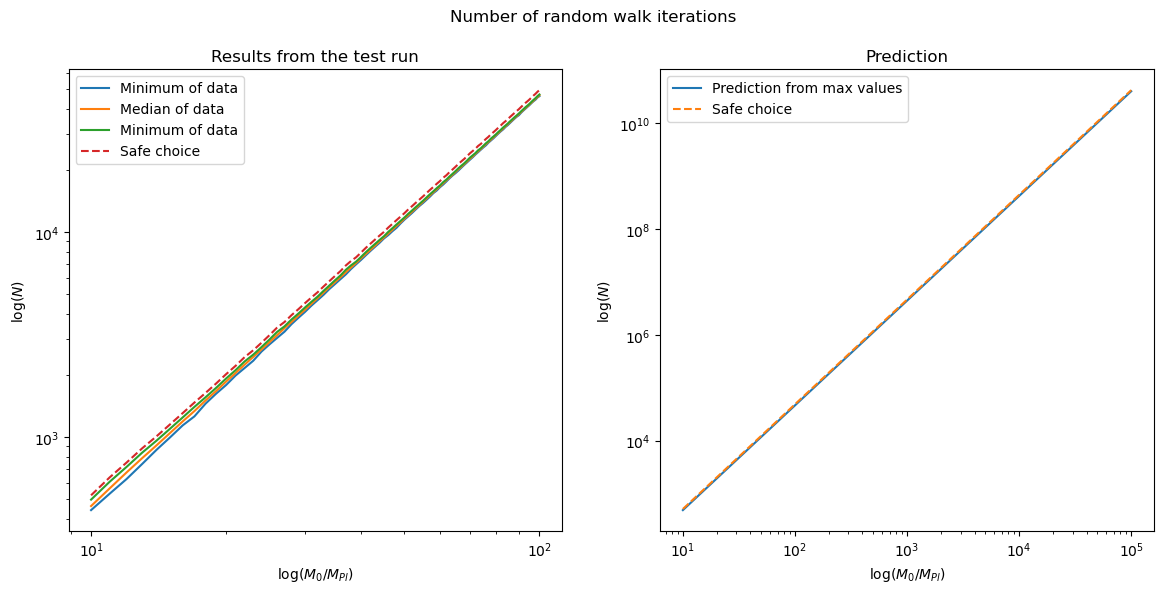

In [45]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle("Number of random walk iterations")

ax1.plot(M_values, n_iters_min, label="Minimum of data")
ax1.plot(M_values, n_iters_median, label="Median of data")
ax1.plot(M_values, n_iters_max, label="Minimum of data")

N_safe = safety_factor * np.array(n_iters_max)
ax1.plot(M_values, N_safe, ls="--", label="Safe choice")

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel(r"$\log(M_{0} / M_{Pl})$")
ax1.set_ylabel(r"$\log(N)$")

ax1.legend()
ax1.set_title("Results from the test run")

ax2.plot(M_predict, N_predict, label="Prediction from max values")

N_safe_test = safety_factor * N_predict

ax2.plot(M_predict, N_safe_test, ls="--", label="Safe choice")

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.set_xlabel(r"$\log(M_{0} / M_{Pl})$")
ax2.set_ylabel(r"$\log(N)$")

ax2.legend()
ax2.set_title("Prediction")

plt.show()

In [50]:
# Get the slope and intercept of the linear regression model for max values
slope = model_max.coef_[0]
y_intercept = model_max.intercept_

In [58]:
python_file_contents_raw = """import numpy as np
import numba as nb

from numbers import Real, Integral

@nb.njit(fastmath = True)
def predict_size(M: Real, extra_factor: Real = 1.) -> Integral:
    \"\"\"
    Predict the size of the arrays changes and rands needed for the 
    compute_BH_evolution function. The parameters within are derived in 
    the predict_size.ipynb notebook.

    Parameters:
    M (Real): the initial mass of the black hole (in Planck masses)
    extra_factor (Real): extra factor for multiplying the size that can 
        be provided by the user

    Returns:
    Integral: the predicted size for the arrays
    \"\"\"
    log_log_intercept = {}
    log_log_coef = {}

    log_M = np.log10(M)
    log_N_predict = log_log_intercept + log_log_coef * log_M
    N_predict = 10**log_N_predict

    N_predict *= 1.05
    N_predict *= extra_factor

    N_predict = int(np.ceil(N_predict))
    return N_predict

"""

In [59]:
file_contents = python_file_contents_raw.format(y_intercept, slope)

print(file_contents)

with open("predict_size.py", "w") as f:
    f.write(file_contents)